<a href="https://colab.research.google.com/github/bignamu/python-AI/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
X = list(range(10))
Y = [1,1,2,4,5,7,8,9,9,10]

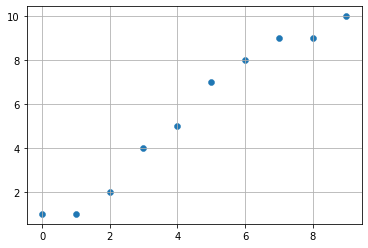

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(X,Y)

plt.grid(True)
plt.style.use("ggplot")
plt.scatter(X,Y)

In [ ]:
class H(): # H라는 template을 만드는 것

  def __init__(self,w): # H의 내부에 w라는 변수에 input을 넣어 hypothesis를 만들겠다.
    #메소드라고 부름 메소드의 첫번째 인자는 self를 넣어야한다 
    self.w = w

  def forward(self, x): #
    return self.w * x

def cost(h,X,Y):
  error = 0
  for i in range(len(X)):
    error += (h.forward(X[i])-Y[i])**2
  error = error / len(X)
  return error

h = H(4) # w값에 따라서 loss가 바뀌는가? loss = cost
print(h.w)
cost(h,X,Y)

4


222.2

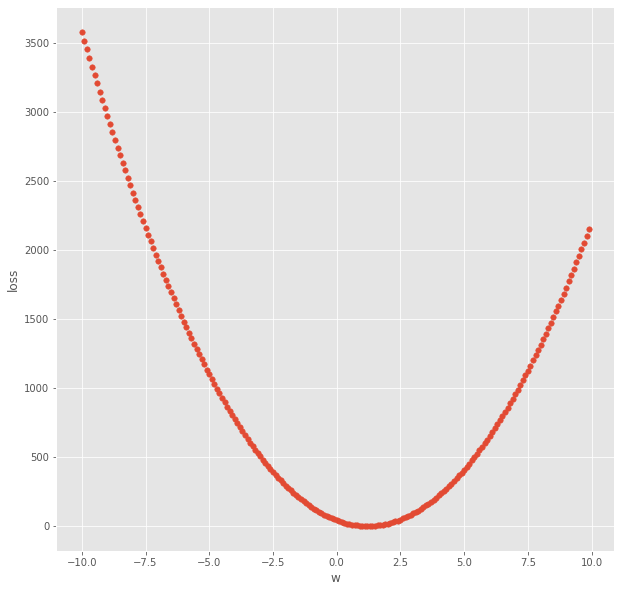

In [ ]:

list_w = []
list_c = []
for i in range(-100,100):
  w = i * 0.1
  h = H(w)
  c = cost(h,X,Y)
  list_w.append(w)
  list_c.append(c)
# print(list_w)
# print(list_c)

plt.figure(figsize=(10, 10))

plt.xlabel('w')
plt.ylabel('loss') 
plt.scatter(list_w,list_c,s=30) # 두 리스트의 길이가 맞아야함


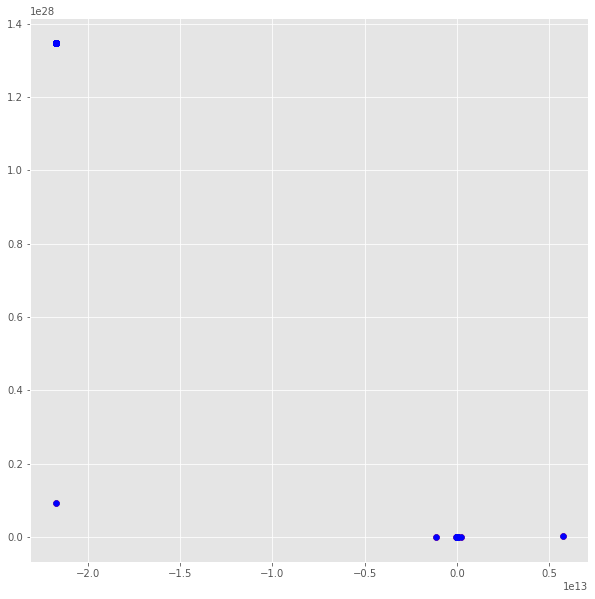

In [ ]:
def cal_grad(w,cost):
  h = H(w)
  cost1 = cost(h,X,Y)
  eps = 0.001
  h = H(w+eps)
  cost2 = cost(h,X,Y)
  dcost = cost2 - cost1
  dw = eps
  grad = dcost / dw
  return grad, (cost1+cost2)*0.5

def cal_grad2(w,cost):
  h = H(w)
  grad = 0
  for i in range(len(X)):
    grad += 2 * (h.forward(X[i])-Y[i]) * X[i]
  grad = grad / len(X)
  c = cost(h,X,Y)
  return grad, c

w1 = 1.4
w2 = 1.4
lr = 0.1

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []
for i in range(100):
  grad, mean_cost = cal_grad(w1,cost)
  grad2, mean_cost2 = cal_grad2(w2,cost)
  
  w1 -= lr * grad
  w2 -= lr * grad
  list_w1.append(w1)
  list_w2.append(w2)
  list_c1.append(mean_cost)
  list_c2.append(mean_cost2)
  # print(w1,mean_cost,w2,mean_cost2)
plt.figure(figsize=(10, 10))
plt.scatter(list_w1,list_c1,c='red')
plt.scatter(list_w2,list_c2,c='blue')